<h1>Plot t-SNE Graph</h1>

In [0]:
# import modules
import os
import numpy as np
import matplotlib.pyplot as plt
from keras import backend as K
from sklearn.manifold import TSNE
from matplotlib.pyplot import figure
from keras.models import Model, load_model
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [0]:
# load up extracted embeddings
load_embeddings = True
load_tsne = False

# load label data
labels = np.load('data/npy_data/signal_dataset/test/labels.npy')

# load embedding data
if load_embeddings == True and load_tsne is False:
    embeddings = np.load('signal_embeddings128.npy')
if load_embeddings == False and load_tsne is False:
    # load signal data
    signals = np.load('data/npy_data/signal_dataset/test/signals.npy')
    signals = signals.reshape([-1, 1024, 2])
    # load model
    model = load_model('weights_best/weights.hdf5')
    # get output from embedding layer
    embedding_output = Model(inputs=model.input, outputs=model.get_layer('dense_2').output)
    embeddings = embedding_output.predict(signals)
    np.save('signal_embeddings128.npy', embeddings)

m = 10000
embeddings = embeddings[:m]
labels = labels[:m]

In [0]:
# assign a color for each type of signal
colors = []
for i in range(len(labels)):
    label = labels[i].tolist()
    color = label.index(1) + 1
    colors.append(color)
    
cols = list(range(1,25))

In [0]:
# load tsne data
if load_tsne == True:
    transformed = np.load('tsne.npy')
else:
    # run t-SNE algorithm
    model = TSNE(metric='cosine')
    transformed = model.fit_transform(embeddings)

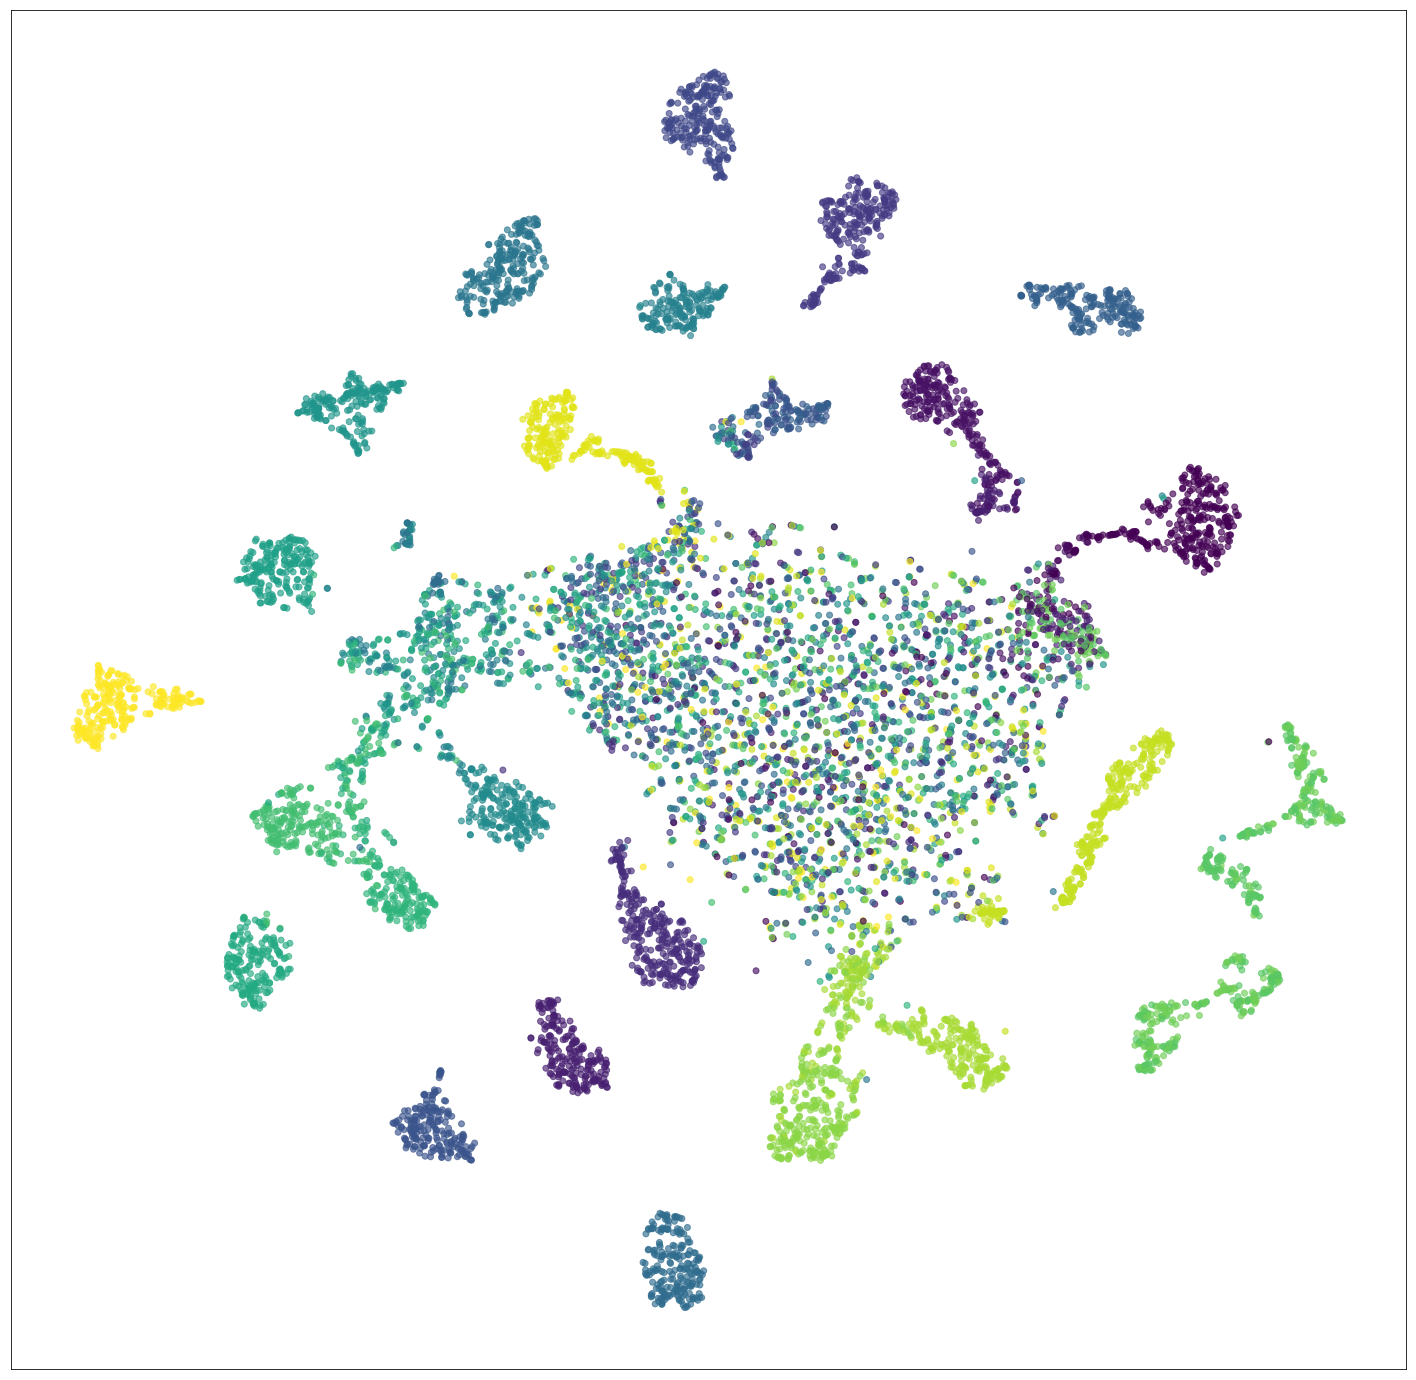

In [0]:
# plot results 

figure(figsize=(25,25))
plt.xticks([])
plt.yticks([])
x = transformed[:,0]
y = transformed[:,1]
plt.scatter(x, y, c=colors, alpha=.65)
plt.show()